In [1]:
import pandas as pd
import numpy as np

#visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#statistic
from scipy import stats


import warnings 
warnings.filterwarnings("ignore")

# Latar Belakang:
- Restoran adalah salah satu jenis usaha jasa pangan yang bertempat di sebagian atau seluruh bangunan yang permanen, dilengkapi dengan peralatan dan perlengkapan untuk proses pembuatan, penyimpanan, penyajian, dan penjualan makanan dan minuman bagi umum di tempat usahanya dan memenuhi ketentuan persyaratan yang ditetapkan dalam keputusan ini (Keputusan Menteri Pariwisata, Pos dan Telekomunikasi Nomor KM. 95/HK.103/MPT-87). 
- Kemajuan teknologi  informasi seperti smartphone dan media sosial telah mengubah perilaku manusia. Perubahan perilaku orang terlihat ketika hendak ingin mengunjungi sebuah restaurant atau rumah makan yang ingin dikunjungi, informasi tersebut dapat dilihat melalui website ataupun aplikasi yang menyediakan infomasi restaurant disekitar kita.Berangkat dari hal tersebut, salah satu aplikasi yang menyajikan informasi seputar restaurant/tempat yaitu zomato
- Zomato adalah layanan penyedia informasi tempat kuliner yang menyediakan informasi lengkap meliputi daftar makanan, foto, ulasan, hingga rating berbagai restoran. 
- Salah satu faktor yang menentukan keberhasilan sebuah restaurant/rumah makan  dalam industri kuliner saat ini adalah tingkat kepuasan konsumen/rating.
- Rating atau tingkat kepuasan konsumen dapat diartikan :
   - a) tingkat perasaan dimana seseorang menyatakan hasil perbandingan atas kualiatas sebuah produk maupun jasa yang diterima dan diharapkan.
   - b)  respon pelanggan terhadap evaluasi ketidaksesuaian terhadap produk ataupun jasa yang dirasakan anatara harapan sebelumnya dengan dampak yang dirasakan setelah menggunakan produk atau jasa.   
- Berdasarkan penjelasan diatas maka penulis ingin melakukan penelitian mengenai **“Restaurant Rating Analysis and Restaurant Rating Prediction Based on Zomato”**.


## Bisnis Problem.
- Berdasarkan Latar Belakang sebelumnya, penulis memiliki beberapa bisnis problem mengenai **Restaurant Rating**, yaitu:
    - Apakah restoran yang menyediakan reservasi table cenderung memiliki rating yang lebih tinggi ?
    - Apakah restoran yang menyediakan order secara online cenderung memiliki rating yang lebih tinggi ?
    - Wilayah mana yang memiliki jumlah restaurant terbanyak?
    
## Dataset
- Dataset yang digunakan merupakan public dataset yang dikeluarkan oleh zomato.
- Zomato adalah layanan penyedia informasi tempat kuliner yang menyediakan informasi lengkap.
- Bangalore merupakan ibu kota dari negara bagian dan kota terbesar di negara bagian India Karnartaka
- Sekitar 12.000 restaurant terdapat di Bangalore yang menyajikan hampir seluruh jenis makanan yang ada di dunia.
- link dataset https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants
- Adapun kolom pada dataset berisi:
    - url : Alamat website restoran
    - address : Detail alamat dimana restoran berada
    - name : Nama restoran
    - online_order : Mengetahui apakah restoran menyediakan layanan booking pemesanan makanan secara online atau tidak 
    - book_table : Ketersediaan restoran dalam menyediakan reservasi makan ditempat
    - rate : Angka penilaian restoran yang diberikan oleh konsumen dengan nilai maks 5
    - votes : Total dari rating yang diberikan oleh konsumen
    - phone : Nomor telfon restoran
    - location : Area dimana restoran berada
    - rest_type : Tipe restoran
    - dish_liked : Makanan yang paling disukai konsumen pada tiap restoran
    - cuisines : Jenis masakan, biasanya dihubungkan dengan masakan khas suatu daerah
    - approx_cost(for two people) : Perkiraan harga makanan untuk dua orang
    - reviews_list : Testimoni pengunjung
    - menu_item : List yang berisi menu makanan
    - listed_in(type) : Jenis pelayanan restoran, seperti Buffet, caffe
    - listed_in(city) : Menjelaskan dimana restoran yang ingin didaftarkan, misalnya Resto A Cabang Banashankari ingin didaftarkan oleh Resto A Cabang Jayanager maka listed in city adalah Jayanager


## 1. Cleaning Data

In [2]:
data = pd.read_csv("zomato.csv")

In [3]:
df= data.copy()

In [8]:
df[:100].to_html("zomato.html")

#### Mengecek null value seluruh feature

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#### Mengecek presentase null value pada semua feature

In [5]:
pd.DataFrame(round(df.isnull().sum()/df.shape[0] *100,3), columns= ['Missing Value Percentage'])

,Missing Value Percentage
url,0.000
address,0.000
name,0.000
online_order,0.000
book_table,0.000
rate,15.034
votes,0.000
phone,2.336
location,0.041
rest_type,0.439


#### Mengecek jumlah null value pada tiap feature

In [6]:
df.isna().sum().sort_values()

url                                0
menu_item                          0
reviews_list                       0
listed_in(type)                    0
votes                              0
listed_in(city)                    0
book_table                         0
online_order                       0
name                               0
address                            0
location                          21
cuisines                          45
rest_type                        227
approx_cost(for two people)      346
phone                           1208
rate                            7775
dish_liked                     28078
dtype: int64

#### Melihat jenis nama column,typedata,total null value, jumlah unique values, contoh unique values pada dataset

In [7]:

pd.DataFrame({'Column Name': df.columns, 'DataType': df.dtypes,
             'Total Null Value': df.isna().sum(),'unique': df.nunique(),
              'sample unique values': [list(df[i].drop_duplicates().sample(1))for i in df.columns]}).reset_index(drop=True)

,Column Name,DataType,Total Null Value,unique,sample unique values
0,url,object,0,51717,[https://www.zomato.com/bangalore/peat-fire-jp...
1,address,object,0,11495,"[103,7th Main,Near Reliable Acacia,Off Sarjapu..."
2,name,object,0,8792,[Indian Spicy Food]
3,online_order,object,0,2,[No]
4,book_table,object,0,2,[No]
5,rate,object,7775,64,[4.2/5]
6,votes,int64,0,2328,[976]
7,phone,object,1208,14926,[+91 8147981939]
8,location,object,21,93,[New BEL Road]
9,rest_type,object,227,93,"[Food Court, Quick Bites]"


#### Drop null value pada feature ``rate``  sebesar 15% dari keseluruhan data


In [8]:
df = df.dropna(axis=0,subset=['rate'])

#### Drop null value pada feature ``cuisines``  sebanyak 45 row dari keseluruhan data


In [9]:
df = df.dropna(axis=0,subset=['cuisines'])

#### Mengganti nama kolom

In [10]:
df.columns = ['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'cost_two_person', 'reviews_list', 'menu_item',
       'service_type', 'registered_city']

##### Merubah nilai rating yang 'NEW' menjadi nol dan "-" menjadi np.nan (data kosong)

In [11]:
df['rate'].replace('NEW','0', inplace=True)

In [12]:
df['rate'].replace("-",np.nan,inplace=True)

##### Menghapus /5 pada rating

In [13]:
df['rate'] = df['rate'].astype('str')

In [14]:
df['rate'] = df['rate'].apply(lambda x: x.split("/")[0])

In [15]:
#sebelah paling kanan terdapat spasi dihapus
df['rate'] = df['rate'].str.rstrip()

##### Mengubah tipe data rating dari string to float

In [16]:
df['rate'] = df['rate'].astype('float')

#### Merubah feature `cost_two_person` datatype menjadi float

In [17]:
df['cost_two_person'] = df[~(df['cost_two_person'].isna())]['cost_two_person'].apply(lambda x: x.split(","))

In [18]:
df['cost_two_person'] = df[~(df['cost_two_person'].isna())]['cost_two_person'].apply(lambda x: "".join(x))

In [19]:
df['cost_two_person'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', nan, '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [20]:
df['cost_two_person'] = df['cost_two_person'].astype("float")

#### Handling Duplicate Value

In [21]:
# columns=['url',
#  'address',
#  'name',
#  'online_order',
#  'book_table',
#  'rate',
#  'votes',
#  'phone',
#  'location',
#  'rest_type',
#  'dish_liked',
#  'cuisines',
#  'cost_two_person',
#  'reviews_list',
#  'menu_item',
#  'service_type',
#  'registered_city']
columns=[ 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'cost_two_person',
 'reviews_list',
 'menu_item',
 'service_type','registered_city']
duplicates = df.duplicated(subset=columns, keep=False)
duplicated_rows = df[duplicates]
duplicated_rows.sort_values(['name','rate','service_type'])

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost_two_person,reviews_list,menu_item,service_type,registered_city
41402,https://www.zomato.com/bangalore/andhra-expres...,"168/4, Ward 57, Abbaiah Reddy, Layout Main Roa...",Andhra Express,Yes,No,3.7,19,080 49653153,CV Raman Nagar,"Takeaway, Delivery",NaN,"Andhra, Biryani, North Indian, Beverages",300.0,"[('Rated 5.0', 'RATED\n Amazing take away / h...",[],Delivery,Marathahalli
41404,https://www.zomato.com/bangalore/andhra-expres...,"168/4, Ward 57, Abbaiah Reddy, Layout Main Roa...",Andhra Express,Yes,No,3.7,19,080 49653153,CV Raman Nagar,"Takeaway, Delivery",NaN,"Andhra, Biryani, North Indian, Beverages",300.0,"[('Rated 5.0', 'RATED\n Amazing take away / h...",[],Delivery,Marathahalli
9286,https://www.zomato.com/bangalore/bisimillah-bi...,"51, 5th Main, 60 Feet Road, BNG Homestay Build...",Bisimillah Biriyani,No,No,3.5,11,+91 8050077699\r\n+91 9731841212,BTM,Quick Bites,NaN,"Biryani, Fast Food",300.0,"[('Rated 4.0', 'RATED\n Very delicious food @...",[],Delivery,BTM
9549,https://www.zomato.com/bangalore/bisimillah-bi...,"51, 5th Main, 60 Feet Road, BNG Homestay Build...",Bisimillah Biriyani,No,No,3.5,11,+91 8050077699\r\n+91 9731841212,BTM,Quick Bites,NaN,"Biryani, Fast Food",300.0,"[('Rated 4.0', 'RATED\n Very delicious food @...",[],Delivery,BTM
9449,https://www.zomato.com/bangalore/bisimillah-bi...,"51, 5th Main, 60 Feet Road, BNG Homestay Build...",Bisimillah Biriyani's & Kebab's,No,No,3.3,6,+91 8050077699\r\n+91 9731841212,BTM,Quick Bites,NaN,"Biryani, Fast Food",300.0,[],[],Delivery,BTM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9470,https://www.zomato.com/bangalore/the-paratha-s...,"Koramangala 1st Block, Bangalore",The Paratha Stories,Yes,No,3.3,36,+91 9035955192,Koramangala 1st Block,Delivery,NaN,North Indian,400.0,"[('Rated 3.0', 'RATED\n There is enough scope...",[],Delivery,BTM
9454,https://www.zomato.com/bangalore/vyanjan-btm?c...,"744, 13th Main, 7th Cross, BTM 2nd Stage, BTM,...",Vyanjan,Yes,No,3.9,201,+91 9916937446,BTM,Quick Bites,"Poha, Jalebi, Paratha, Bhindi Masala, Kachori,...","North Indian, Street Food",300.0,"[('Rated 3.0', ""RATED\n Nice place, it's for ...","['Jeera Rice', 'Khichdi', 'Plain Tawa Roti', '...",Delivery,BTM
9464,https://www.zomato.com/bangalore/vyanjan-btm?c...,"744, 13th Main, 7th Cross, BTM 2nd Stage, BTM,...",Vyanjan,Yes,No,3.9,201,+91 9916937446,BTM,Quick Bites,"Poha, Jalebi, Paratha, Bhindi Masala, Kachori,...","North Indian, Street Food",300.0,"[('Rated 3.0', ""RATED\n Nice place, it's for ...","['Jeera Rice', 'Khichdi', 'Plain Tawa Roti', '...",Delivery,BTM
27649,https://www.zomato.com/bangalore/wedding-birya...,"1086/A, Twin Tulips, 18th Cross, 14th Main Roa...",Wedding Biryani,No,No,0.0,0,+91 8095066833,HSR,Quick Bites,NaN,"Biryani, Kebab",600.0,[],[],Delivery,Koramangala 4th Block


In [22]:
#Pembuktian bahwa semua kolom sama kecuali URL
print(df.loc[41402,'url'])
print('\n')
print(df.loc[41404,'url'])

https://www.zomato.com/bangalore/andhra-express-cv-raman-nagar-bangalore?context=eyJzZSI6eyJlIjpbIjE4NTA0NjU1IiwiMTg4MjU0NTQiLCIxODkzNTA4NSIsIjE4NzYzNzcyIiwxODg5Njg2NCwiMTg5MjIxOTYiLCIxODI0NjUwMCIsIjE4OTU5NDI5IiwiNTQ5NjMiLCIxODc4NTA5OCIsIjE4NzE2MzEwIiwiNTQzMzQiLCIxODY4NDc1MiIsIjE4NjYzNjEzIiwiNTM3ODQiXSwidCI6IkRlbGl2ZXJ5IFJlc3RhdXJhbnRzIGluIE1hcmF0aGFoYWxsaSJ9fQ==


https://www.zomato.com/bangalore/andhra-express-cv-raman-nagar-bangalore?context=eyJzZSI6eyJlIjpbIjE4OTM1MDg1IiwiMTg3NjM3NzIiLCIxODY2MzYxMyIsIjUzNzg0IiwxODg5Njg2NCwiMTg5MjIxOTYiLCIxODc4NTA5OCIsIjE4MjQ2NTAwIiwiMTg5NTk0MjkiLCI1NDk2MyIsIjE4NzE2MzEwIiwiNTQzMzQiLCIxODY4NDc1MiIsIjE4NzkwNTQ4IiwiMTg4MjU3MDIiXSwidCI6IkRlbGl2ZXJ5IFJlc3RhdXJhbnRzIGluIE1hcmF0aGFoYWxsaSJ9fQ==


##### Ketika dilakukan check duplicates terdapat indikasi duplicates rows tetapi ada kemungkinan bahwa restoran name sampai dengan rating memiliki informasi yang sama namun memiliki url yang berbeda dan dapat diasumsikan bahwa restaurant tersebut merupakan restaurant yang sama namun pada saat meng-update url restaurant, sistem zomato tidak mereplace url, melainkan sistem hanya mengintegrasikan data lainnya.

In [23]:
columns

['address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'cost_two_person',
 'reviews_list',
 'menu_item',
 'service_type',
 'registered_city']

## 2. Exploratory Data Analysis

### a ) Melihat jumlah restaurant bedasarkan rating

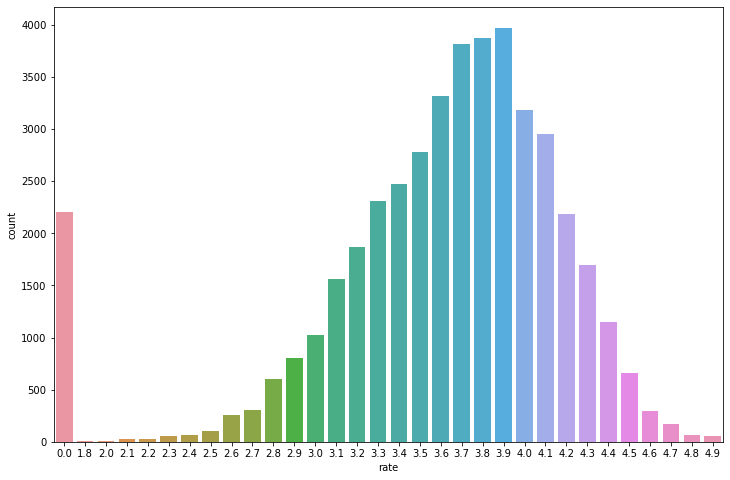

In [24]:
%matplotlib inline
plt.figure(figsize=(12,8))
sns.countplot(df['rate'])
plt.savefig("Jumlah restaurant bedasarkan rating");

### b )  Normal Test pada feature ``rate``

In [25]:
k2, p = stats.normaltest(df['rate'])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = nan
The null hypothesis cannot be rejected


#### Bedasarkan perhitungan normal test dapat diartikan bahwa feature ``rate`` terdistribusi secara normal

### c) Melihat jumlah antara restoran yang menyediakan booking pemesanan secara online dan tidak 

In [26]:
label_book = df['book_table'].unique().tolist()

In [27]:
df_total_book_table = df.groupby(by="book_table").count().sort_values('name',ascending=True)['name']
df_total_book_table


book_table
Yes     6433
No     37498
Name: name, dtype: int64

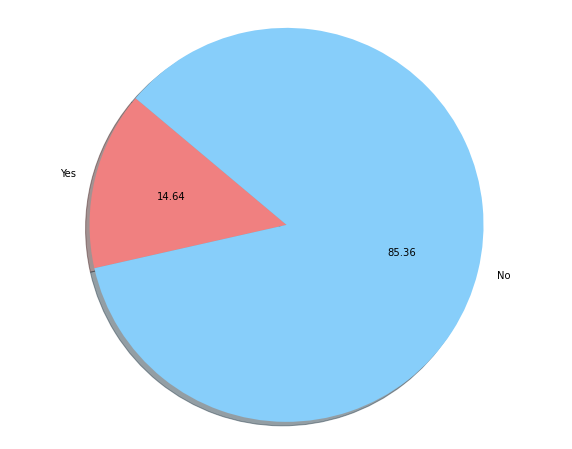

In [28]:
colors = ["lightcoral","lightskyblue"]
plt.figure(figsize=(10,8))
plt.pie(df_total_book_table, labels=label_book,autopct = '%.2f',colors=colors,shadow=True,startangle=140)
plt.axis('equal') #bentuk lingkaran
plt.savefig("jumlah antara restoran yang menyediakan booking pemesanan secara online dan tidak");

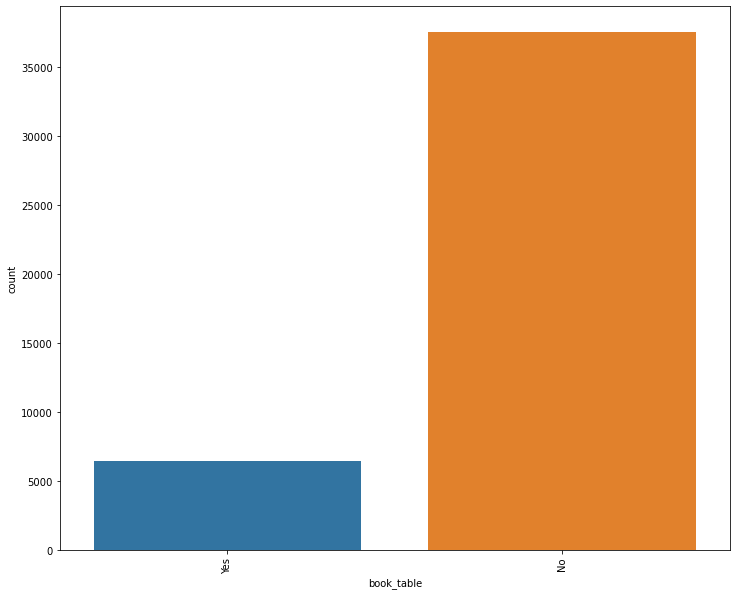

In [29]:
%matplotlib inline
plt.figure(figsize=(12,10))
sns.countplot(df['book_table'])
plt.xticks(rotation=90);

##### Pada diagram bisa disimpulkan bahwa sekitar 85% restaurant di  Bangalore tidak menyediakan layanan reservasi tempat

### d) Melihat hubungan  antara restoran yang menyediakan reservasi tempat terhadap rating

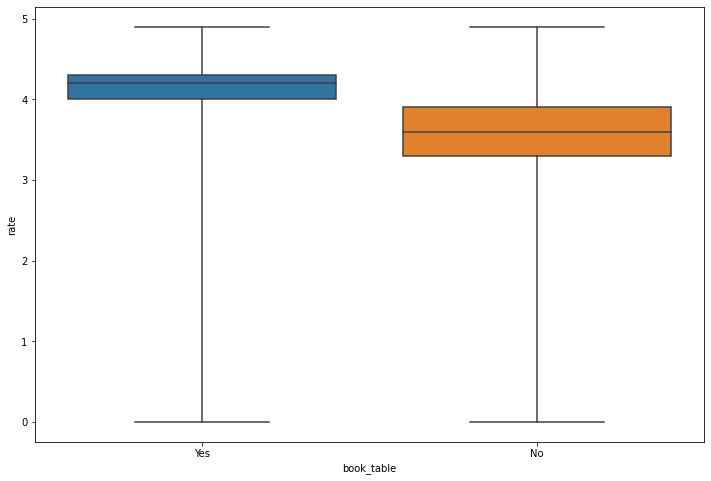

In [30]:

plt.figure(figsize=(12,8))
sns.boxplot(x='book_table',y="rate" ,data=df,whis=(0,100));

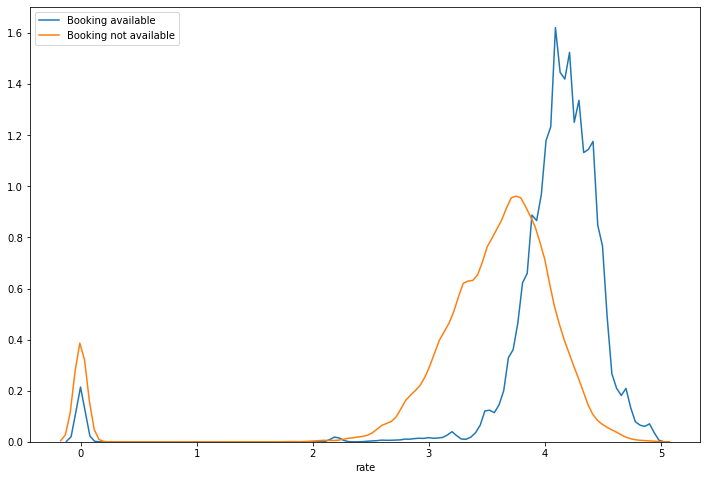

In [31]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['book_table']=='Yes']['rate'],hist=False,label="Booking available")
sns.distplot(df[df['book_table']=='No']['rate'],hist=False,label="Booking not available")
plt.savefig("Hubungan antara restoran yang menyediakan reservasi tempat terhadap rating");
# sns.distplot('rate',df[df['book_table']=='No'],hist=False)


Dari diagram diatas bisa ditunjukan bahwa resto yang menyediakan reservasi online memiliki rating yang lebih baik dari restoran yang tidak menyediakan reservasi secara online, kesimpulannya yaitu jika ingin membuka sebuah restoran di Bangalore disarankan untuk menyediakan jasa reservasi table secara online karena kemungkinan besar akan mempengaruhi rating

### e) Melihat Jumlah antara restoran yang menyediakan booking pemesanan secara online dan tidak 

In [32]:
labels = df['online_order'].unique().tolist()
labels


['Yes', 'No']

In [33]:
df_total_online_order = df.groupby(by="online_order").count().sort_values('online_order',ascending=False)['name']
df_total_online_order

online_order
Yes    28300
No     15631
Name: name, dtype: int64

In [34]:
labels = df['online_order'].unique().tolist()
labels

['Yes', 'No']

''

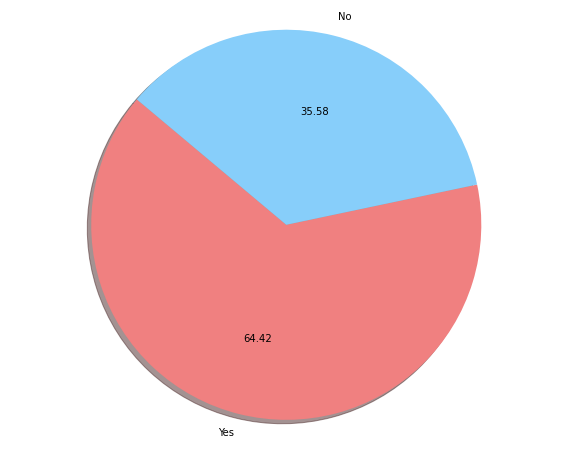

In [35]:
colors = ["lightcoral","lightskyblue"]
plt.figure(figsize=(10,8))
plt.pie(df_total_online_order, labels=labels,autopct = '%.2f',colors=colors,shadow=True,startangle=140)
plt.axis('equal') #bentuk lingkaran
plt.savefig("Jumlah antara restoran yang menyediakan booking pemesanan secara online dan tidak")
;

In [36]:
df_total_online = df.groupby(by="online_order").count()['url']
df_total_online

online_order
No     15631
Yes    28300
Name: url, dtype: int64

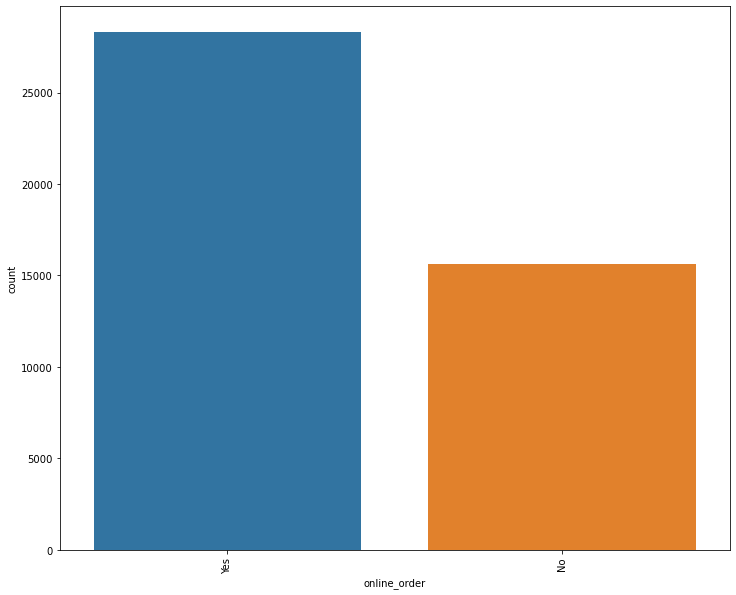

In [37]:
%matplotlib inline
plt.figure(figsize=(12,10))
sns.countplot(df['online_order'])
plt.xticks(rotation=90);

1. Bedasarkan diagram diatas dapat disimpulkan bahwa restoran yang menyediakan jasa online order memiliki proporsi sekitar 64%
2. Sedangkan proporsi restaurant yang tidak menyediakan jasa online order memiliki proporsi 36%


### f) Melihat pengaruh ``online order`` terhadap rating restaurant

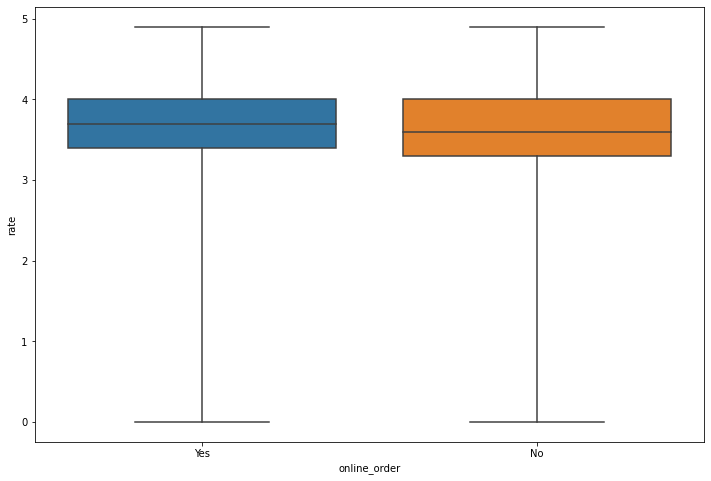

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(x="online_order",y="rate",data=df,whis=(0,100));

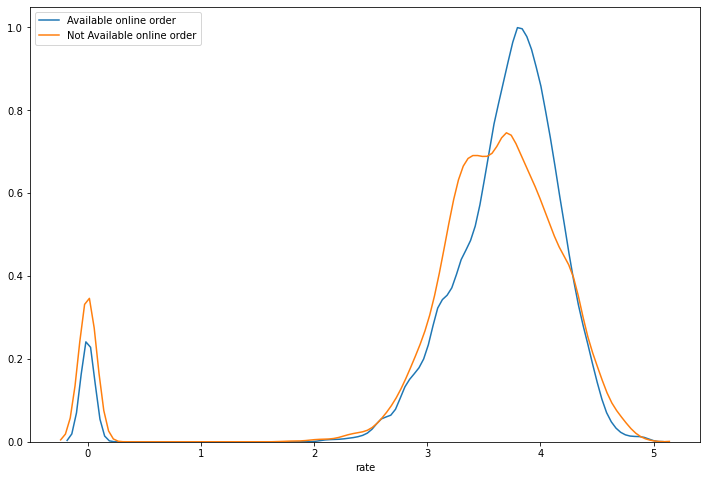

In [39]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['online_order']=='Yes']['rate'],hist=False,label="Available online order")
sns.distplot(df[df['online_order']=='No']['rate'],hist=False,label="Not Available online order")
plt.savefig("Melihat pengaruh online order terhadap rating restaurant");

In [40]:
df['online_order'].value_counts()

Yes    28300
No     15631
Name: online_order, dtype: int64

Bisa disimpulkan bahwa rating restoran belum tentu naik meskipun tersedia layanan online order, karena bisa dilihat pada grafik distribusi rating antara **available online order** dan **not availble online order** 

### g ) Melihat jumlah restaurant bedasarkan feature ``cost_two_person``

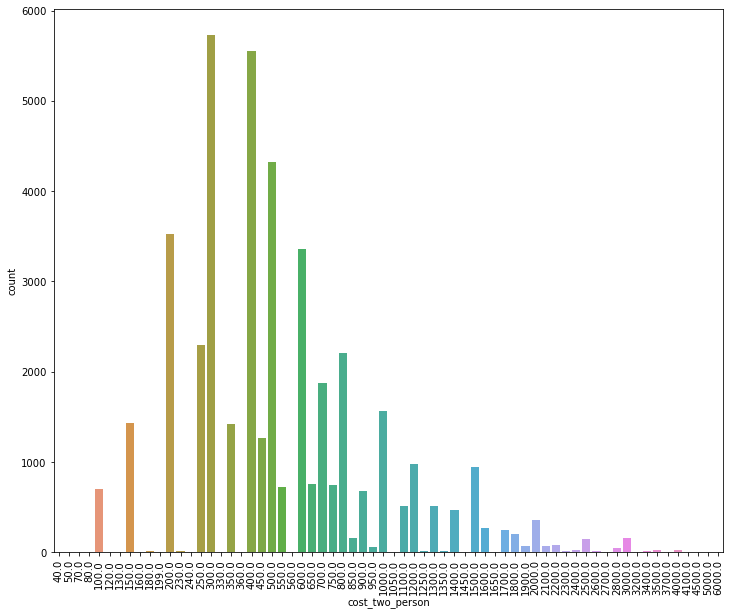

In [41]:
%matplotlib inline
plt.figure(figsize=(12,10))
sns.countplot(df['cost_two_person'])
plt.xticks(rotation=90)
plt.savefig("jumlah restaurant bedasarkan feature cost_two_person");


### h )  Normal Test pada feature ``cost_two_person``

In [42]:
k2, p = stats.normaltest(df['cost_two_person'])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = nan
The null hypothesis cannot be rejected


Bedasarkan perhitungan normal test dapat diartikan bahwa feature ``cost_two_person`` tidak terdistribusi secara normal

### i )  Hubungan antara  ``cost_two_person`` dengan `` rating``

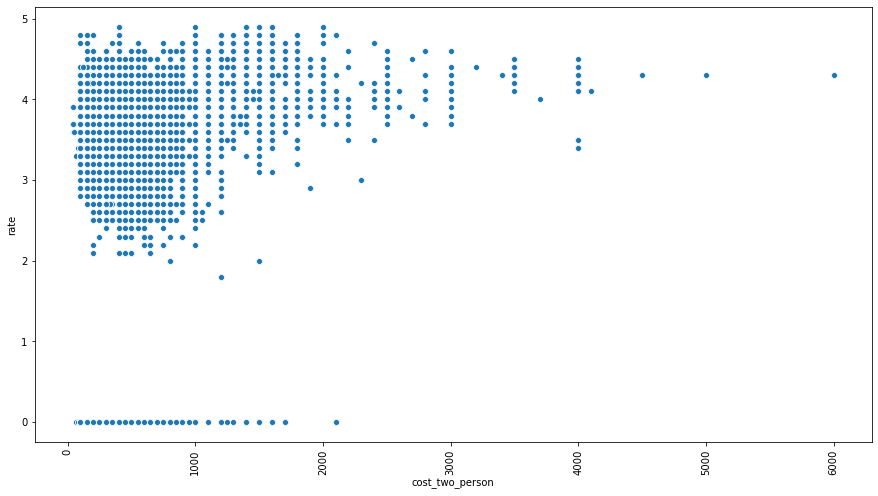

In [43]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="cost_two_person",y="rate",data=df)
plt.xticks(rotation=90)
plt.savefig("Hubungan antara cost_two_person dengan rating");

bisa disimpulkan bahwa restaurant yang berharga kisaran 0 - 2000 memiliki rating yang beragagam, sedangkan untuk restaurant yang berharga kisaran dimulai dari 3000 memiliki rating diatas 3

### j ) Menampilkan 25 restaurant yang memiliki rating teratas

In [44]:
top_25_restaurant_by_rate= df.groupby(by="name").mean().sort_values('rate',ascending=False).reset_index().head(25)
top_25_restaurant_by_rate['name'].replace('SantÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Spa Cuisine','Spa Cuisine',inplace=True)

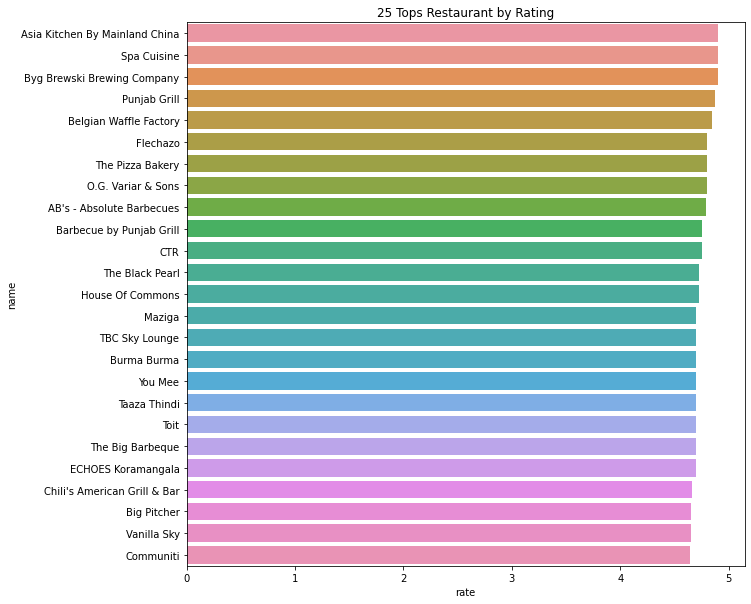

In [45]:
%matplotlib inline
plt.figure(figsize=(10, 10))
# sns.load_dataset("top_25_restaurant_by_rate")
sns.barplot(y="name", x="rate", data=top_25_restaurant_by_rate)
plt.title("25 Tops Restaurant by Rating")
plt.savefig("25 Tops Restaurant by Rating");

### k ) Menampilkan 25 restaurant yang memiliki rating terbawah

In [46]:
lowest_25_restaurant_by_rate= df[df['rate']>0].groupby(by="name").mean().sort_values('rate',ascending=True).reset_index().head(25)
lowest_25_restaurant_by_rate['name'].replace('SantÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Spa Cuisine','Spa Cuisine',inplace=True)
lowest_25_restaurant_by_rate

,name,rate,votes,cost_two_person
0,Alibi - Maya International Hotel,1.800000,224.600000,1200.0
1,Fusion Lounge,2.000000,397.000000,1500.0
2,Decker's Lane,2.100000,242.500000,400.0
3,Bageecha,2.150000,479.000000,650.0
4,Mamma Mexicana,2.200000,407.384615,1000.0
5,Taste Of Kerala,2.240000,48.000000,600.0
6,Bhagini,2.283333,140.250000,800.0
7,Meghana Biryani,2.300000,237.000000,800.0
8,Vande Matharam,2.300000,179.000000,500.0
9,Biryani Junction,2.300000,298.000000,450.0


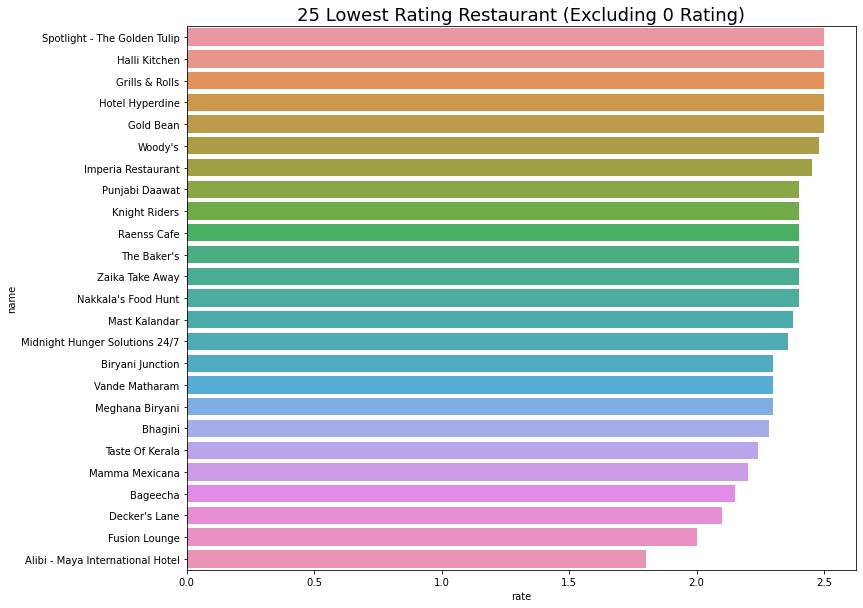

In [47]:
plt.figure(figsize=(12, 10))
# sns.load_dataset("top_25_restaurant_by_rate")
sns.barplot(y="name", x="rate", data=lowest_25_restaurant_by_rate.sort_values('rate',ascending=False))
plt.title("25 Lowest Rating Restaurant (Excluding 0 Rating)",fontsize=18)
plt.savefig("25 Lowest Rating Restaurant (Excluding 0 Rating)");

### l ) Menampilkan 25 restaurant yang memiliki rating teratas bedasarkan ``location``

In [48]:
Top_25_location_restaurant_by_rate= df[df['rate']>0].groupby(by="location").mean().sort_values('rate',ascending=False).reset_index().head(25)
Top_25_location_restaurant_by_rate

,location,rate,votes,cost_two_person
0,Lavelle Road,4.142505,1039.396304,1365.384615
1,Koramangala 3rd Block,4.020419,655.282723,834.816754
2,St. Marks Road,4.017201,775.798834,883.673469
3,Koramangala 5th Block,4.005821,957.096162,680.713975
4,Church Street,3.992125,1089.705128,839.835165
5,Sankey Road,3.965385,246.576923,2582.692308
6,Koramangala 4th Block,3.918668,814.692033,758.323424
7,Cunningham Road,3.901053,606.048421,867.157895
8,Residency Road,3.863636,482.568595,1030.049669
9,MG Road,3.855857,532.812577,1244.514502


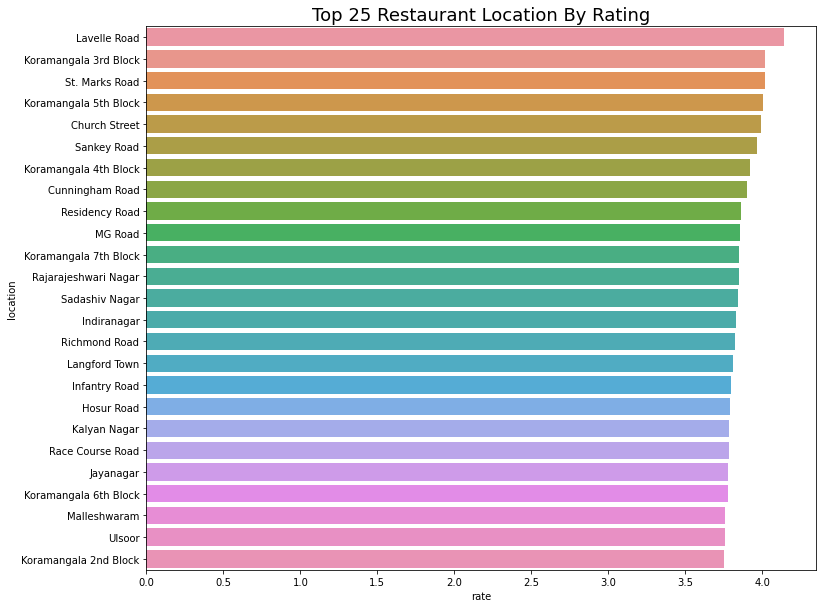

In [49]:
plt.figure(figsize=(12, 10))
sns.barplot(y="location", x="rate", data=Top_25_location_restaurant_by_rate)
plt.title("Top 25 Restaurant Location By Rating",fontsize=18)
plt.savefig("Top 25 Restaurant Location By Rating");

### m ) Menampilkan 25 restaurant yang memiliki rating terbawah bedasarkan ``location``

In [50]:
Lowest_25_location_restaurant_by_rate= df[df['rate']>0].groupby(by="location").mean().sort_values('rate',ascending=True).reset_index().head(25)
Lowest_25_location_restaurant_by_rate

,location,rate,votes,cost_two_person
0,Old Madras Road,3.181818,73.090909,488.636364
1,Bommanahalli,3.190972,53.493056,477.777778
2,Peenya,3.200000,5.000000,300.000000
3,North Bangalore,3.340000,166.300000,325.000000
4,Rammurthy Nagar,3.346154,49.346154,426.923077
5,West Bangalore,3.366667,370.000000,466.666667
6,Nagarbhavi,3.400000,10.000000,250.000000
7,Magadi Road,3.437500,35.291667,362.500000
8,RT Nagar,3.439344,106.163934,443.333333
9,Kumaraswamy Layout,3.466667,105.157233,372.327044


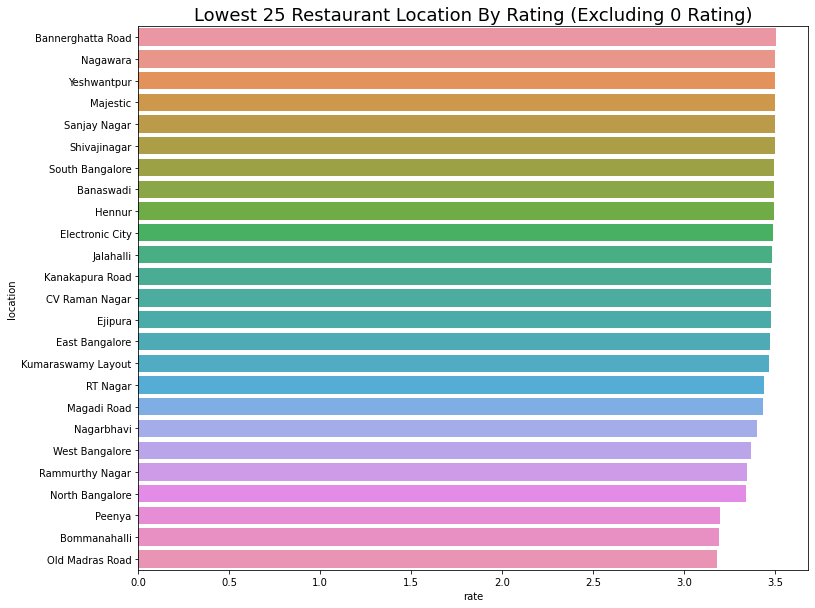

In [51]:
plt.figure(figsize=(12, 10))
sns.barplot(y="location", x="rate", data=Lowest_25_location_restaurant_by_rate.sort_values('rate',ascending=False))
plt.title("Lowest 25 Restaurant Location By Rating (Excluding 0 Rating)",fontsize=18)
plt.savefig("Lowest 25 Restaurant Location By Rating (Excluding 0 Rating)");

### n ) Menampilkan 25 ``location`` restaurant yang memiliki jumlah restaurant terbanyak

In [52]:
Top_25_location_by_number_of_restaurant= df[df['rate']>0].groupby(by="location").count().sort_values('rate',ascending=False).reset_index().head(25)
Top_25_location_by_number_of_restaurant

,location,url,address,name,online_order,book_table,rate,votes,phone,rest_type,dish_liked,cuisines,cost_two_person,reviews_list,menu_item,service_type,registered_city
0,BTM,3930,3930,3930,3930,3930,3930,3930,3852,3903,1508,3930,3906,3930,3930,3930,3930
1,Koramangala 5th Block,2319,2319,2319,2319,2319,2319,2319,2262,2319,1787,2319,2297,2319,2319,2319,2319
2,HSR,2019,2019,2019,2019,2019,2019,2019,1987,2008,1180,2019,2004,2019,2019,2019,2019
3,Indiranagar,1845,1845,1845,1845,1845,1845,1845,1783,1842,1387,1845,1803,1845,1845,1845,1845
4,JP Nagar,1717,1717,1717,1717,1717,1717,1717,1698,1710,993,1717,1717,1717,1717,1717,1717
5,Jayanagar,1643,1643,1643,1643,1643,1643,1643,1590,1641,1067,1643,1636,1643,1643,1643,1643
6,Whitefield,1578,1578,1578,1578,1578,1578,1578,1550,1573,835,1578,1573,1578,1578,1578,1578
7,Marathahalli,1443,1443,1443,1443,1443,1443,1443,1410,1425,702,1443,1428,1443,1443,1443,1443
8,Bannerghatta Road,1235,1235,1235,1235,1235,1235,1235,1215,1231,507,1235,1230,1235,1235,1235,1235
9,Koramangala 6th Block,1077,1077,1077,1077,1077,1077,1077,1056,1062,736,1077,1069,1077,1077,1077,1077


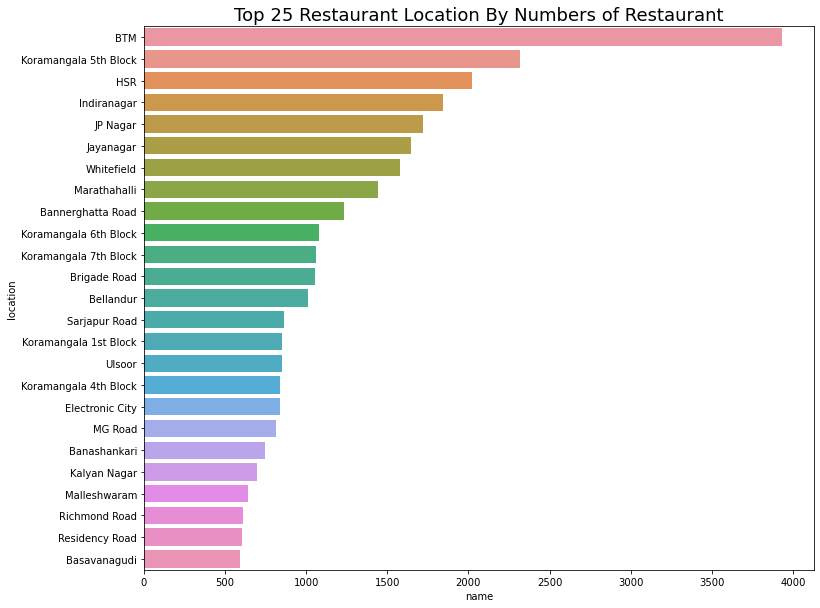

In [53]:
plt.figure(figsize=(12, 10))
sns.barplot(y="location", x="name", data=Top_25_location_by_number_of_restaurant)
plt.title("Top 25 Restaurant Location By Numbers of Restaurant",fontsize=18)
plt.savefig("Top 25 Restaurant Location By Numbers of Restaurant");

### o ) Menampilkan 25 ``location`` yang memiliki sedikit jumlah restaurant

In [54]:
Lowest_25_location_by_number_of_restaurant= df[df['rate']>0].groupby(by="location").count().sort_values('rate',ascending=True).reset_index().head(25)
Lowest_25_location_by_number_of_restaurant

,location,url,address,name,online_order,book_table,rate,votes,phone,rest_type,dish_liked,cuisines,cost_two_person,reviews_list,menu_item,service_type,registered_city
0,Peenya,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
1,Nagarbhavi,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
2,Rajarajeshwari Nagar,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,West Bangalore,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3
4,Yelahanka,5,5,5,5,5,5,5,4,5,2,5,4,5,5,5,5
5,Central Bangalore,8,8,8,8,8,8,8,8,8,3,8,8,8,8,8,8
6,Hebbal,8,8,8,8,8,8,8,8,8,0,8,8,8,8,8,8
7,Kengeri,9,9,9,9,9,9,9,9,9,0,9,9,9,9,9,9
8,Uttarahalli,9,9,9,9,9,9,9,8,9,4,9,9,9,9,9,9
9,KR Puram,10,10,10,10,10,10,10,10,10,1,10,10,10,10,10,10


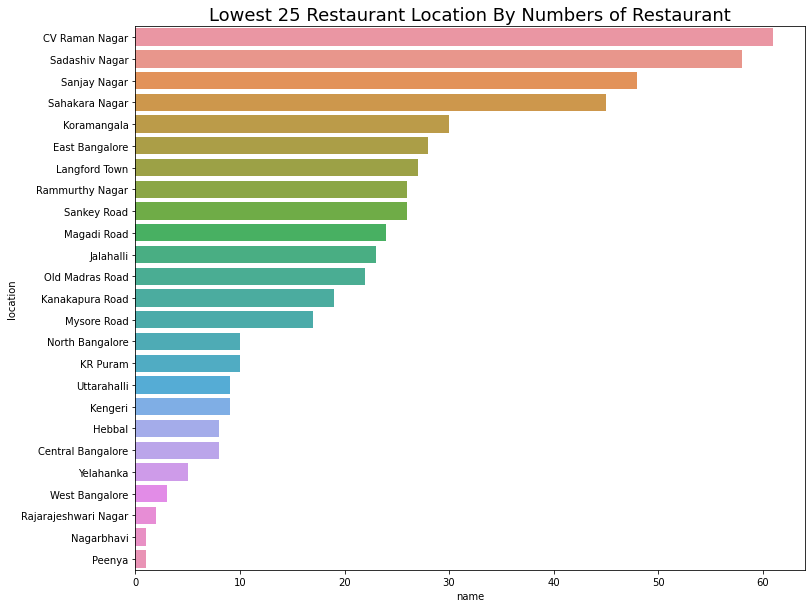

In [55]:
plt.figure(figsize=(12, 10))
sns.barplot(y="location", x="name", data=Lowest_25_location_by_number_of_restaurant.sort_values('rate',ascending=False))
plt.title("Lowest 25 Restaurant Location By Numbers of Restaurant",fontsize=18)
plt.savefig("Lowest 10 Restaurant Location By Number of Restaurant");

### p ) Menampilkan 10 ``cuisines`` teratas bedasarkan rating 

In [56]:
df_group_cuisines = df.groupby(by="cuisines").mean().sort_values('rate',ascending=False).reset_index().head(10)
df_group_cuisines

,cuisines,rate,votes,cost_two_person
0,"Asian, Chinese, Thai, Momos",4.900000,2224.894737,1500.000000
1,"Healthy Food, Salad, Mediterranean",4.900000,246.000000,1000.000000
2,"Continental, North Indian, Italian, South Indi...",4.900000,16588.500000,1600.000000
3,"North Indian, European, Mediterranean, BBQ",4.800000,7127.400000,1500.000000
4,"Asian, Mediterranean, North Indian, BBQ",4.800000,4992.666667,1400.000000
5,"European, Mediterranean, North Indian, BBQ",4.789474,4548.315789,1568.421053
6,"American, Tex-Mex, Burger, BBQ, Mexican",4.750000,6077.375000,1400.000000
7,"North Indian, European, Mediterranean",4.700000,10498.846154,1400.000000
8,"Italian, American, Pizza",4.700000,14956.000000,1500.000000
9,"Continental, European, BBQ, Chinese, Asian",4.700000,6986.600000,2400.000000


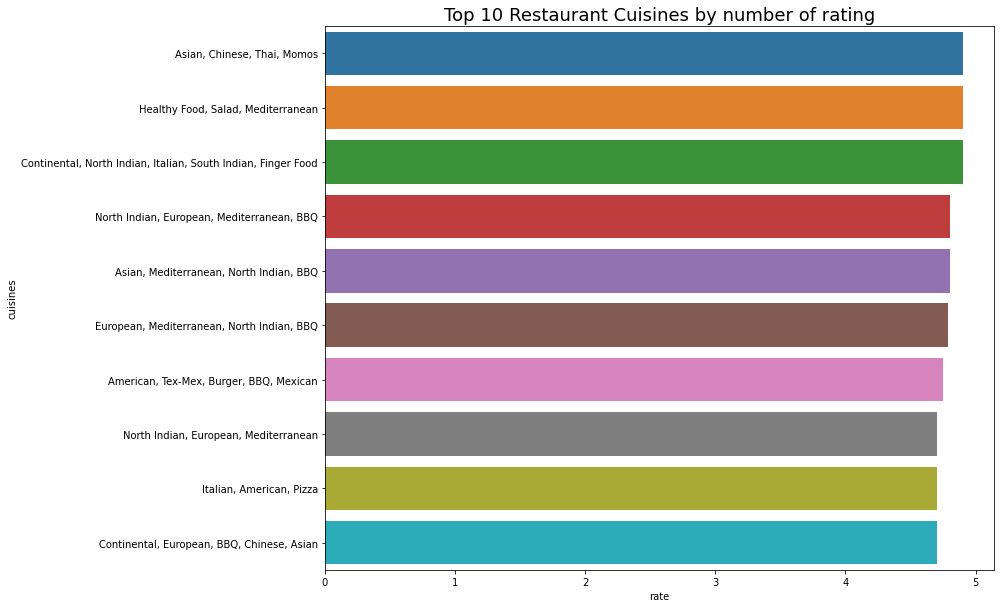

In [57]:
plt.figure(figsize=(12, 10))
sns.barplot(y="cuisines", x="rate", data=df_group_cuisines)
plt.title("Top 10 Restaurant Cuisines by number of rating",fontsize=18)
plt.savefig("Top 10 Restaurant Cuisines by number of rating");

Bisa dilihat pada diagram diatas bahwa hidangan Asia  memiliki dominasi penilaian yang baik, karena mungkin faktor geografis bangalore berada di kawasan Asia bisa disimpulkan dominasi makanan lokal masih sangat berpengaruh

### q ) Menampilkan 10 ``cuisines`` terbawah bedasarkan rating 

In [58]:
df_group_cuisines_lowest = df[df['rate']>0].groupby(by="cuisines").mean().sort_values('rate',ascending=True).reset_index().head(10)
df_group_cuisines_lowest

,cuisines,rate,votes,cost_two_person
0,"Fast Food, Street Food, North Indian, Biryani",2.40,45.000000,400.0
1,"Chinese, European",2.40,25.000000,1000.0
2,"Healthy Food, Salad, Fast Food",2.40,71.000000,500.0
3,"North Indian, Chinese, Arabian, Biryani, Fast ...",2.45,127.000000,500.0
4,"Andhra, North Indian, Chinese, Mangalorean",2.50,60.000000,750.0
5,"North Indian, Chinese, Fast Food, Rolls, Juices",2.50,321.000000,400.0
6,"Cafe, American, Pizza",2.55,157.000000,450.0
7,"North Indian, Chinese, Rolls, Biryani, Kebab",2.60,231.000000,400.0
8,"Kerala, North Indian, Chinese, Rolls, Juices",2.60,166.000000,350.0
9,"Arabian, North Indian, Chinese",2.60,51.285714,300.0


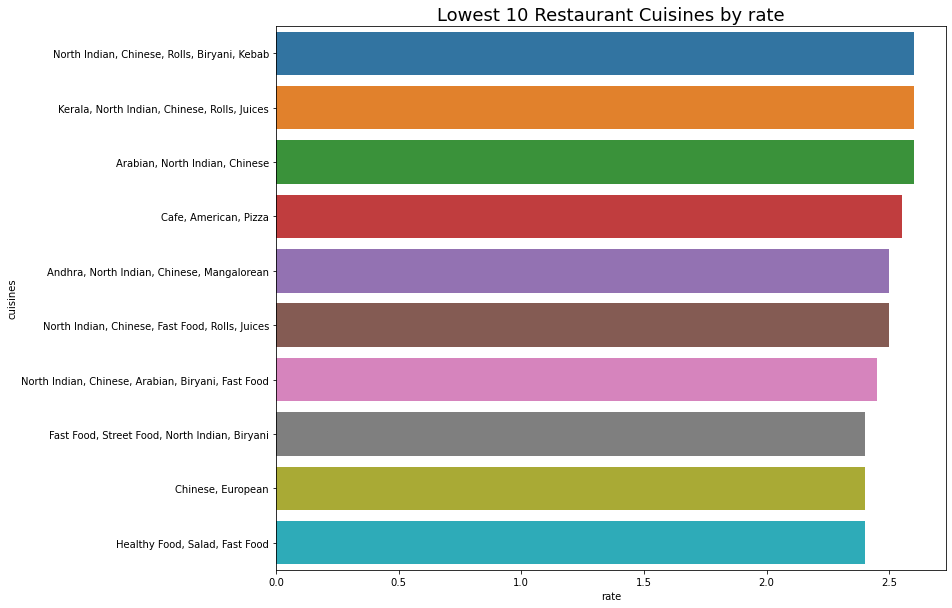

In [59]:
plt.figure(figsize=(12, 10))
sns.barplot(y="cuisines", x="rate", data=df_group_cuisines_lowest.sort_values('rate',ascending=False))
plt.title("Lowest 10 Restaurant Cuisines by rate",fontsize=18)
plt.savefig("Lowest 10 Restaurant Cuisines by rate");


#### Menghitung panjang menu

In [60]:
def remove_list(x):
    a = x.lstrip('[').rstrip(']').split(',')
    if len(a) == 1:
        return 0
    else:
        return len(a)

df['len_menu_item'] = df['menu_item'].apply(lambda x : remove_list(x))


In [61]:
df_len_menu_item = df[df['len_menu_item'] > 0]
df_len_menu_item

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost_two_person,reviews_list,menu_item,service_type,registered_city,len_menu_item
32,https://www.zomato.com/bangalore/sweet-truth-b...,"101 Ground Floor, Manjunatha Complex, 22nd Mai...",Sweet Truth,Yes,No,3.9,35,+91 7710055553,Banashankari,Delivery,NaN,"Bakery, Desserts",500.0,"[('Rated 4.0', 'RATED\n I had the opportunity...","['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (P...",Delivery,Banashankari,33
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,86
39,https://www.zomato.com/bangalore/maruthi-davan...,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,Yes,No,4.0,17,+91 9019563485,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari,12
46,https://www.zomato.com/bangalore/kitchen-garde...,"1750, 14th Main, Police Station Road, Kumarasw...",Kitchen Garden,Yes,No,3.6,244,080 49652867,Kumaraswamy Layout,Quick Bites,Biryani,"North Indian, Chinese",300.0,"[('Rated 3.0', 'RATED\n We ordered two Indian...","['3 Poori with Subji', 'Chole Bhature [2 Piece...",Delivery,Banashankari,32
47,https://www.zomato.com/bangalore/recipe-kumara...,"1621, 1st Floor, 50 Feet Main Road, Kumaraswam...",Recipe,Yes,No,4.0,804,+91 8043755256\r\n+91 9886073774,Kumaraswamy Layout,Casual Dining,"Butter Chicken, Noodles, Thali, Biryani","North Indian, Chinese, Biryani, Rolls",450.0,"[('Rated 3.0', ""RATED\n Ordered Paneer meal v...","['Veg Fried Rice', 'Egg Fried Rice', 'Chicken ...",Delivery,Banashankari,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51664,https://www.zomato.com/bangalore/olivers-pub-d...,"ITPL Ascendas Park Square Mall, ITPL, First Fl...",Oliver's Pub & Diner,Yes,Yes,3.9,548,+91 8043691111\n+91 8028026519,Whitefield,"Pub, Casual Dining","Pizza, Beer, Cocktails, Nachos, Pasta, Moo Bur...","Finger Food, American, Continental, Burger, Pizza",1500.0,"[('Rated 4.0', ""RATED\n I had :-\n\n1. Italia...","['Chicken Wings', 'Pepper Chicken', ""Beef Gril...",Drinks & nightlife,Whitefield,232
51687,https://www.zomato.com/bangalore/red-rhino-whi...,"4th Floor, Uptown Square, Seegehalli, Near All...",Red Rhino,Yes,Yes,4.4,1980,080 49652108,Whitefield,"Microbrewery, Pub","Beer, Margarita, Long Island Iced Tea, Cocktai...","Continental, Mediterranean, South Indian, Nort...",1700.0,"[('Rated 4.0', 'RATED\n Red Rhino is a Brewer...","['Hangover', 'Smoking Hot Red Rhino Chilli Chi...",Pubs and bars,Whitefield,166
51688,https://www.zomato.com/bangalore/ji-hazoor-whi...,"TR 9, 4th Floor, Plot 95, EPIP Zone, Near Vaid...",Ji Hazoor,Yes,Yes,4.0,2856,080 49652519,Whitefield,"Casual Dining, Bar","Chicken Salad, Mocktails, Mutton Curry, Chicke...","Mughlai, North Indian, Biryani, Afghan",1100.0,"[('Rated 4.0', 'RATED\n Was there on last Wed...","['Dal Tadka', 'Dal Makhani', 'Paneer Tikka Mas...",Pubs and bars,Whitefield,151
51693,https://www.zomato.com/bangalore/one-for-the-r...,"87/2A & 87/3, SH 35, Seegehalli, Whitefield, B...",One For The Road,Yes,Yes,4.1,137,080 49652780,Whitefield,Bar,"Cocktails, Pasta, Fish","Continental, North Indian, Finger Food",1200.0,"[('Rated 4.0', 'RATED\n Had been there on a S...","['Chicken Manchow Soup', 'Chicken Lollipop', '...",Pubs and bars,Whitefield,178


### r ) Menampilkan 10 restaurant dengan menu terbanyak

Text(0.5, 1.0, 'Highest 10 Restaurant With Most Menu Item')

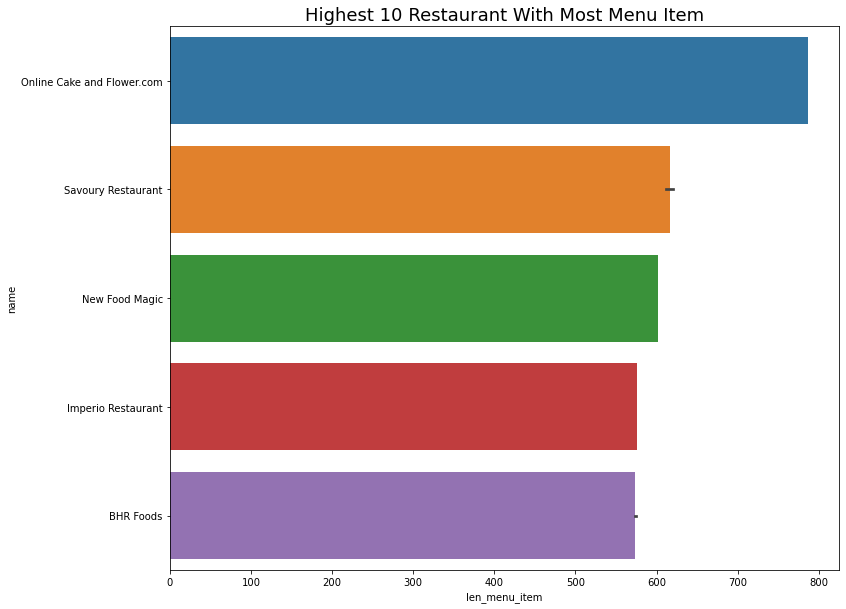

In [62]:
plt.figure(figsize=(12, 10))
sns.barplot(y="name", x="len_menu_item", data=df_len_menu_item.sort_values('len_menu_item',ascending=False).head(10))
plt.title("Highest 10 Restaurant With Most Menu Item",fontsize=18)
#plt.savefig("Highest_10_Restaurant_with_most_menu_item.png");

### s ) Menampilkan 10 restaurant dengan paling sedikit menyediakan menu

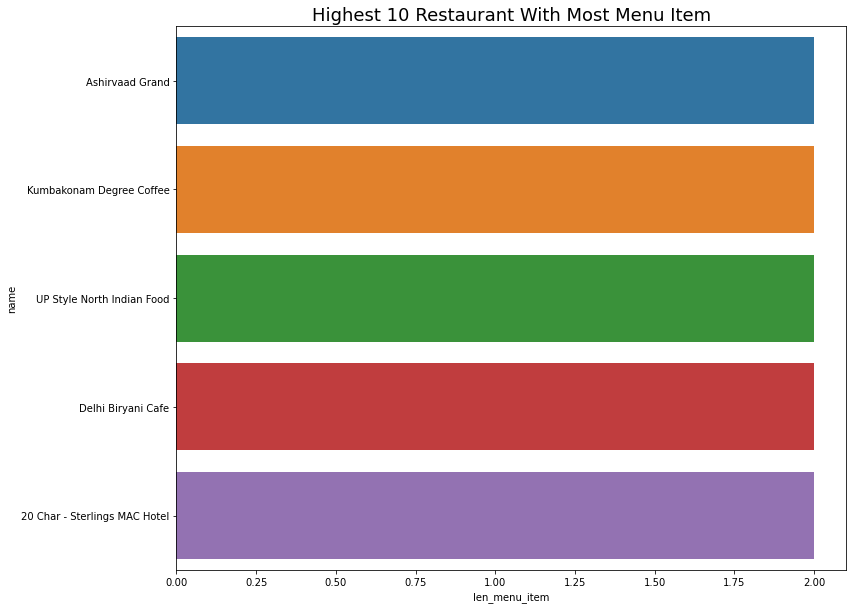

In [71]:
plt.figure(figsize=(12, 10))
sns.barplot(y="name", x="len_menu_item", data=df_len_menu_item.sort_values('len_menu_item',ascending=True).head(5))
plt.title("Highest 10 Restaurant With Most Menu Item",fontsize=18);

### t ) Hubungan antara banyaknya menu terhadap rating

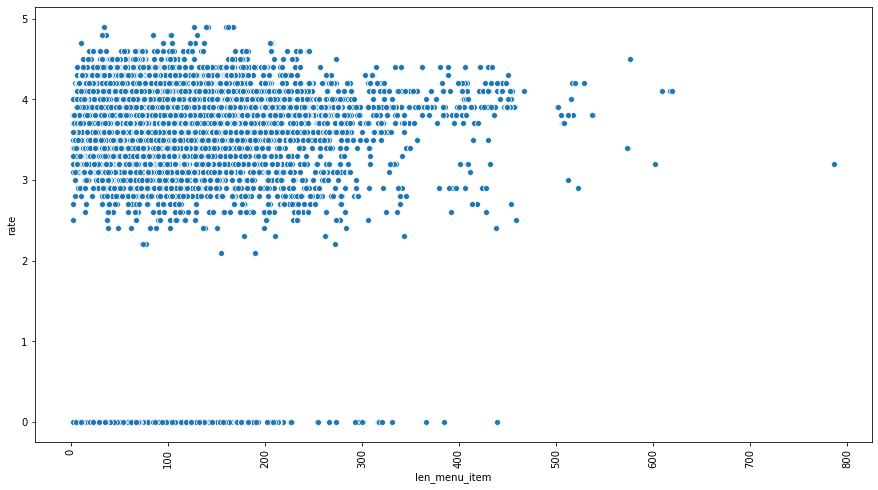

In [72]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="len_menu_item",y="rate",data=df_len_menu_item)
plt.xticks(rotation=90)
plt.savefig("Hubungan antara len_menu_item dengan rating");